In [1]:
from pathlib import Path
import statistics
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
import numpy as np

In [2]:
folder = Path(r"C:\Users\martin\git\master-thesis\6_evaluation\models\mallet\confidence_interval\palmetto")

model_coherences = []

for file in folder.glob("*"):
    topic_coherences = []
    for line in file.open().readlines():
        coherence = line.split("\t")[1]
        topic_coherences.append(float(coherence))
    if len(topic_coherences) == 60:
        model_coherences.append(topic_coherences)

df = pd.DataFrame(model_coherences)
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
47,0.340166,0.383527,0.399095,0.351405,0.334795,0.332833,0.437844,0.340906,0.340888,0.366830,...,0.357062,0.330623,0.342645,0.421067,0.482596,0.396144,0.386373,0.400064,0.388707,0.329632
48,0.374685,0.340257,0.346909,0.348014,0.352462,0.482151,0.362370,0.346011,0.365714,0.355388,...,0.368058,0.334094,0.332153,0.344325,0.366846,0.333084,0.466113,0.325349,0.341708,0.331171
49,0.352383,0.344900,0.336092,0.379290,0.449462,0.480168,0.354872,0.337341,0.341146,0.352117,...,0.355474,0.379191,0.328303,0.358931,0.338048,0.361087,0.356764,0.326873,0.338528,0.400781
50,0.331689,0.404093,0.334457,0.348359,0.384111,0.351615,0.392753,0.329858,0.486919,0.340301,...,0.377595,0.366275,0.401137,0.354245,0.345521,0.366833,0.331723,0.410345,0.395287,0.340779
51,0.337174,0.340686,0.367153,0.324064,0.334477,0.364399,0.366222,0.412447,0.338863,0.412342,...,0.486919,0.356188,0.365168,0.365646,0.339097,0.337093,0.330001,0.400064,0.346495,0.349129


In [10]:
means = df.mean()

C:\Users\martin\scoop\apps\miniconda3\current\envs\tmr\lib\site-packages\scipy\stats\_continuous_distns.py:4530: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]
C:\Users\martin\scoop\apps\miniconda3\current\envs\tmr\lib\site-packages\scipy\stats\_continuous_distns.py:4530: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]


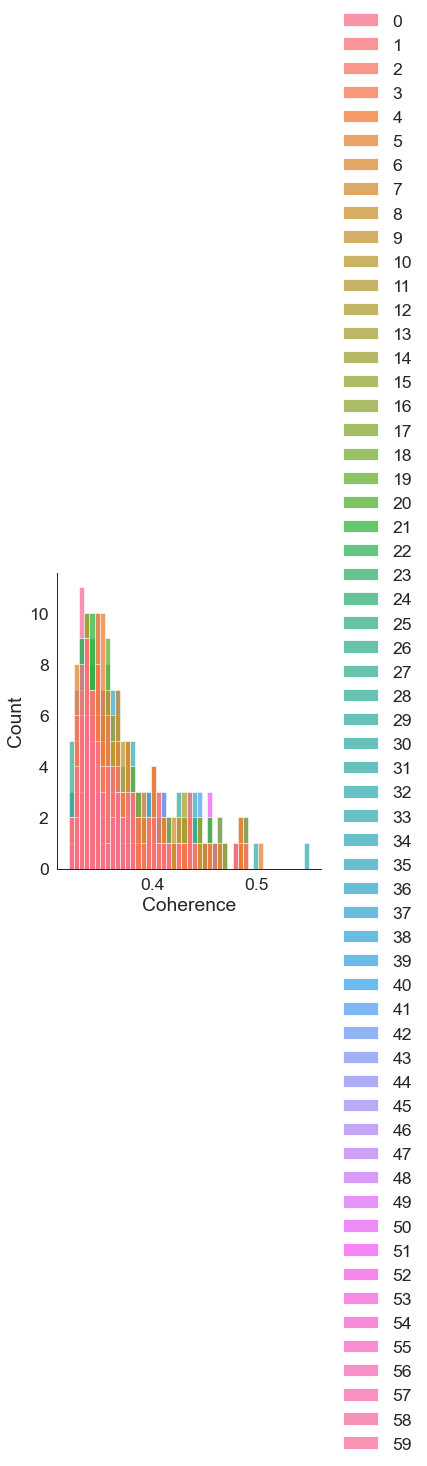

C:\Users\martin\scoop\apps\miniconda3\current\envs\tmr\lib\site-packages\scipy\stats\_continuous_distns.py:4530: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]


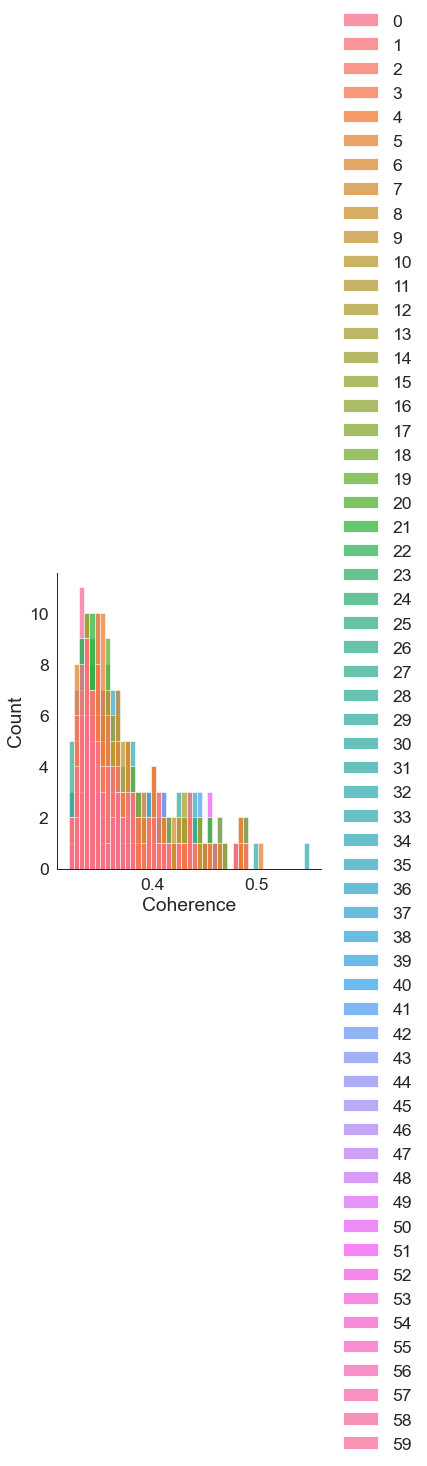

In [16]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
ax = sns.displot(data=df, kind="hist")
ax.set(xlabel="Coherence")
plt.show()

In [11]:
coherence = means.values
all = df.values

In [14]:
f = Fitter(all)
f.fit()

C:\Users\martin\scoop\apps\miniconda3\current\envs\tmr\lib\site-packages\scipy\stats\_continuous_distns.py:4530: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]


,sumsquare_error,aic,bic,kl_div
johnsonsu,190.101146,-41.026352,-8697.677493,inf
lognorm,190.281001,-43.131777,-8702.772639,inf
invgauss,192.476043,-40.777400,-8666.986978,inf
f,193.722768,-32.648671,-8638.797399,inf
invgamma,197.347867,-44.340507,-8588.998532,inf


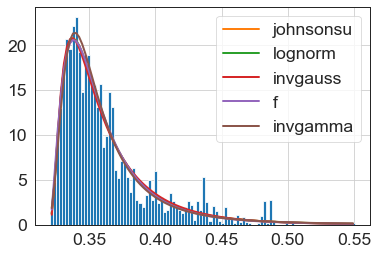

In [17]:
f.summary(plot=True)

,sumsquare_error,aic,bic,kl_div
johnsonsu,190.101146,-41.026352,-8697.677493,inf
lognorm,190.281001,-43.131777,-8702.772639,inf
invgauss,192.476043,-40.777400,-8666.986978,inf
f,193.722768,-32.648671,-8638.797399,inf
invgamma,197.347867,-44.340507,-8588.998532,inf


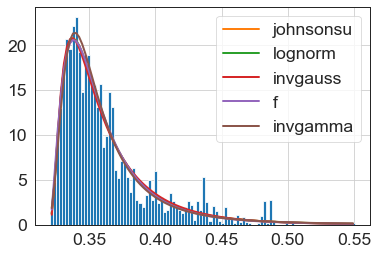

In [18]:
f.summary()

In [ ]:
means = [statistics.mean(mc) for mc in model_coherences]
print("Means: ", means)
print("Min: ", sorted(means)[1])
print("Max: ", max(means))

overall_mean = statistics.mean(means)
print("Overall Mean: ", overall_mean)

x = [i for i in range(len(means))]
plt.figure(1)
plt.plot(x, means, "bo", label="Modellkohärenz")
plt.axhline(y=overall_mean, color="red", linestyle="--", label="Durchschnitt")
plt.xlabel("Topic-Nummer")
plt.ylabel("Kohärenz")


plt.legend()



plt.savefig(r"C:\Users\martin\git\master-thesis\figures\confidence_interval.png")

plt.show()